# Mobile Price Classification Using Neural Network

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras import optimizers

In [2]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [3]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [4]:
# Checking for missing values
missing_values = X.isnull().sum().sum()
print("Number of missing values in the dataset:",missing_values)

Number of missing values in the dataset: 0


In [5]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(1600, 20)

In [8]:
X_test.shape

(400, 20)

## ReLU Activation Function

In [9]:
# Designing the neural network
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='softmax'))

In [10]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3481 - loss: 1.3157 - val_accuracy: 0.6175 - val_loss: 0.9821
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.8551 - val_accuracy: 0.8350 - val_loss: 0.5197
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.4331 - val_accuracy: 0.9025 - val_loss: 0.3201
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2629 - val_accuracy: 0.9000 - val_loss: 0.2512
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1683 - val_accuracy: 0.9225 - val_loss: 0.2016
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1326 - val_accuracy: 0.9250 - val_loss: 0.1837
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.1035 - val_accuracy: 0.9375 - val_loss: 0.1710
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0798 - val_accuracy: 0.9200 - v

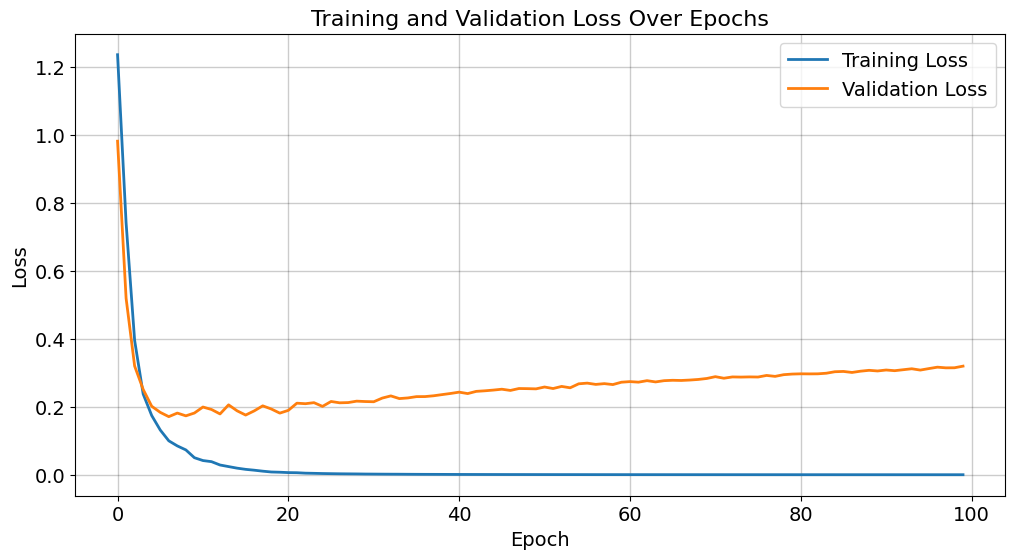

In [11]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

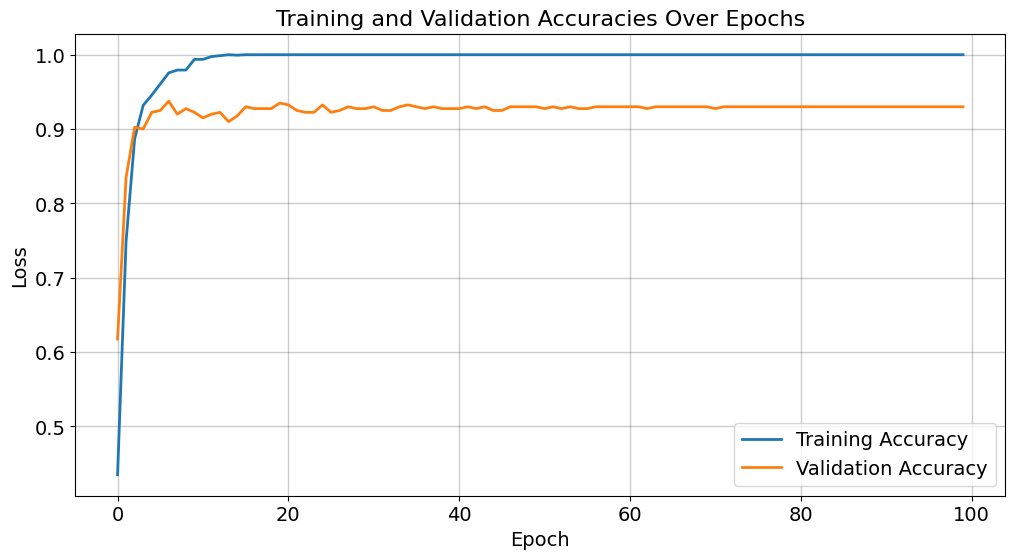

In [12]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [13]:
# Predictions for training and test sets
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [14]:
# Convert predictions to class labels
y_train_pred_classes1 = y_train_pred1.argmax(axis=1)
y_test_pred_classes1 = y_test_pred1.argmax(axis=1)

# Training metrics
train_accuracy1 = accuracy_score(y_train, y_train_pred_classes1)
train_precision1 = precision_score(y_train, y_train_pred_classes1, average='macro')
train_recall1 = recall_score(y_train, y_train_pred_classes1, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred_classes1, average='macro')

# Test metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred_classes1)
test_precision1 = precision_score(y_test, y_test_pred_classes1, average='macro')
test_recall1 = recall_score(y_test, y_test_pred_classes1, average='macro')
test_f1_1 = f1_score(y_test, y_test_pred_classes1, average='macro')

In [15]:
print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3))
print("Training Recall (in %):",round(train_recall1*100,3))
print("Training F1 Score (in %):",round(train_f1_1*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3))
print("Test Recall (in %):",round(test_recall1*100,3))
print("Test F1 Score (in %):",round(test_f1_1*100,3))

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0

Test Accuracy (in %): 93.0
Test Precision (in %): 92.825
Test Recall (in %): 92.8
Test F1 Score (in %): 92.788


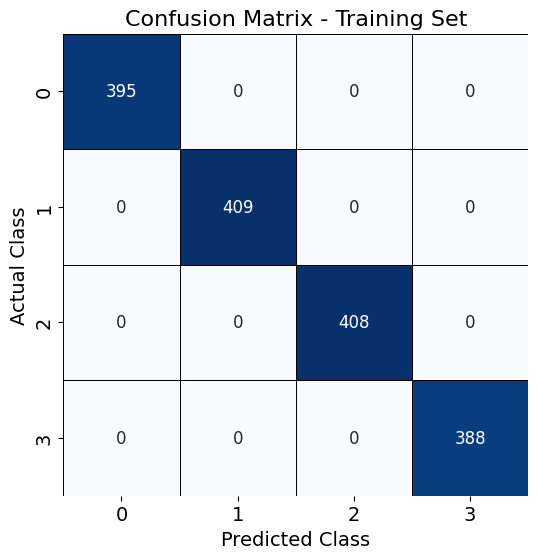

In [16]:
# Confusion matrix for training set
train_conf_matrix1 = confusion_matrix(y_train, y_train_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

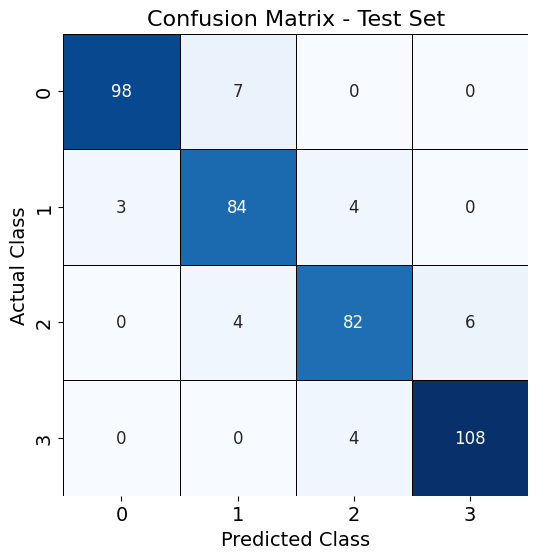

In [17]:
# Confusion matrix for test set
test_conf_matrix1 = confusion_matrix(y_test, y_test_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [18]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts1 = pd.Series(y_train_pred_classes1).value_counts().sort_index()

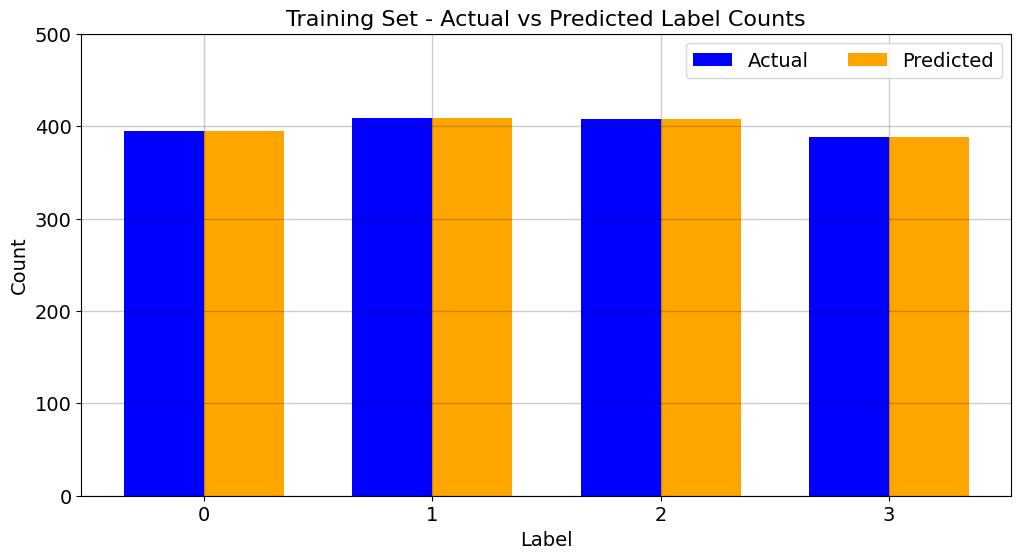

In [20]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [21]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts1 = pd.Series(y_test_pred_classes1).value_counts().sort_index()

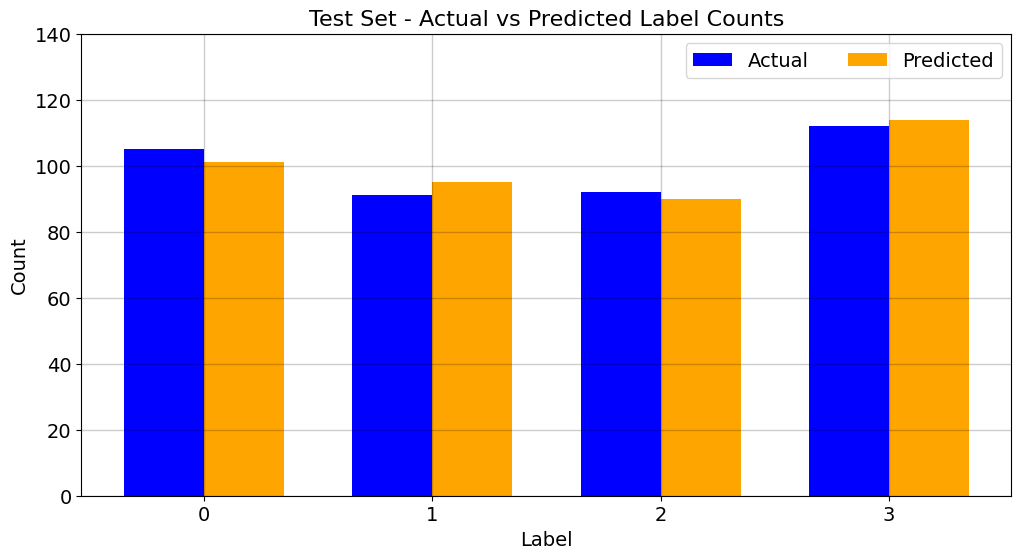

In [24]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

## Tanh Activation Function

In [25]:
# Designing the neural network
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(4, activation='softmax'))

In [34]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.6879e-05 - val_accuracy: 0.9225 - val_loss: 0.4871
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1436e-05 - val_accuracy: 0.9225 - val_loss: 0.5079
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.3814e-06 - val_accuracy: 0.9225 - val_loss: 0.5249
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.1843e-06 - val_accuracy: 0.9250 - val_loss: 0.5408
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9535e-06 - val_accuracy: 0.9225 - val_loss: 0.5537
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.2290e-06 - val_accuracy: 0.9250 - val_loss: 0.5608
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7985e-06 - val_accuracy: 0.9250 - val_loss: 0.5702
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.448

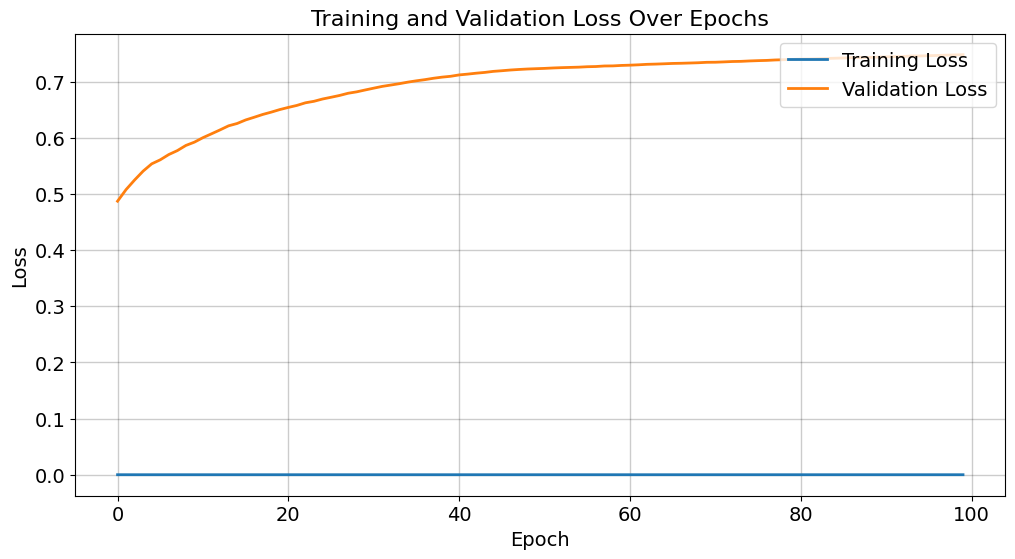

In [35]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

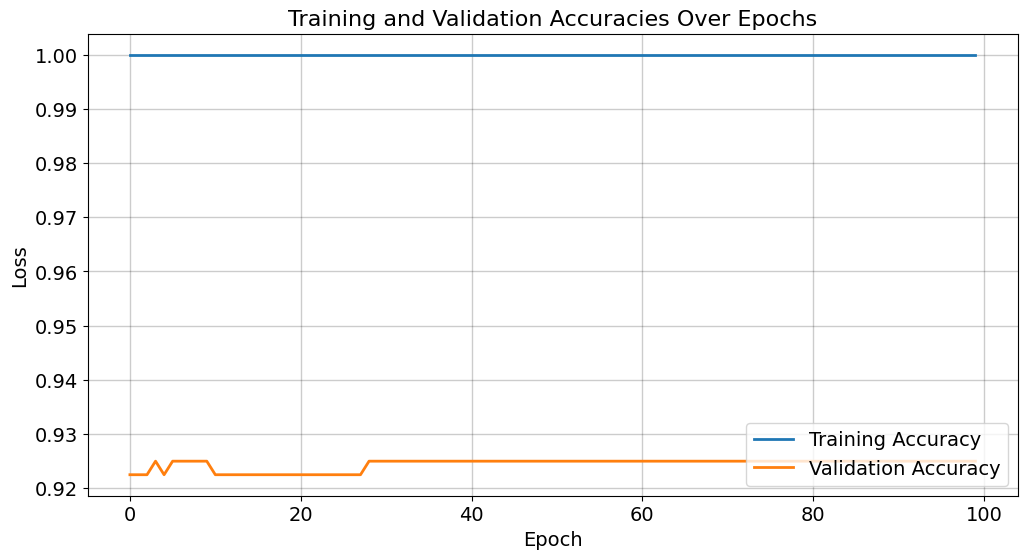

In [36]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [37]:
# Predictions for training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [38]:
# Convert predictions to class labels
y_train_pred_classes2 = y_train_pred2.argmax(axis=1)
y_test_pred_classes2 = y_test_pred2.argmax(axis=1)

# Training metrics
train_accuracy2 = accuracy_score(y_train, y_train_pred_classes2)
train_precision2 = precision_score(y_train, y_train_pred_classes2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred_classes2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred_classes2, average='macro')

# Test metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred_classes2)
test_precision2 = precision_score(y_test, y_test_pred_classes2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred_classes2, average='macro')
test_f1_2 = f1_score(y_test, y_test_pred_classes2, average='macro')

In [39]:
print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3))
print("Training Recall (in %):",round(train_recall2*100,3))
print("Training F1 Score (in %):",round(train_f1_2*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3))
print("Test Recall (in %):",round(test_recall2*100,3))
print("Test F1 Score (in %):",round(test_f1_2*100,3))

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0

Test Accuracy (in %): 92.5
Test Precision (in %): 92.466
Test Recall (in %): 92.293
Test F1 Score (in %): 92.304


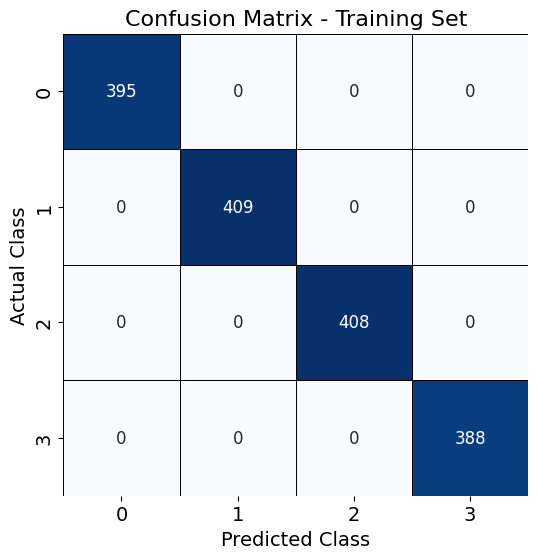

In [40]:
# Confusion matrix for training set
train_conf_matrix2 = confusion_matrix(y_train, y_train_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

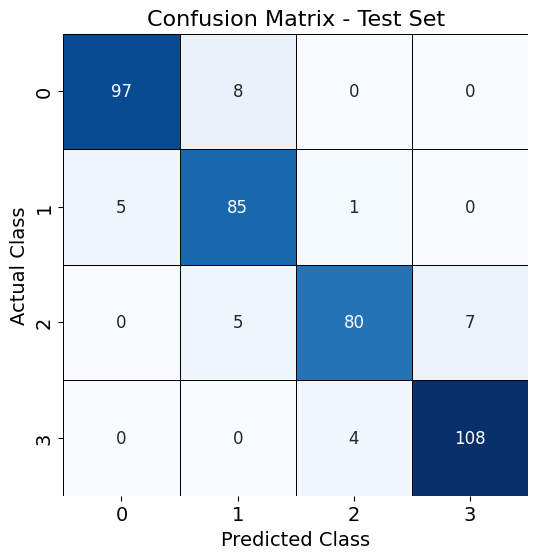

In [41]:
# Confusion matrix for test set
test_conf_matrix2 = confusion_matrix(y_test, y_test_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [42]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts2 = pd.Series(y_train_pred_classes2).value_counts().sort_index()

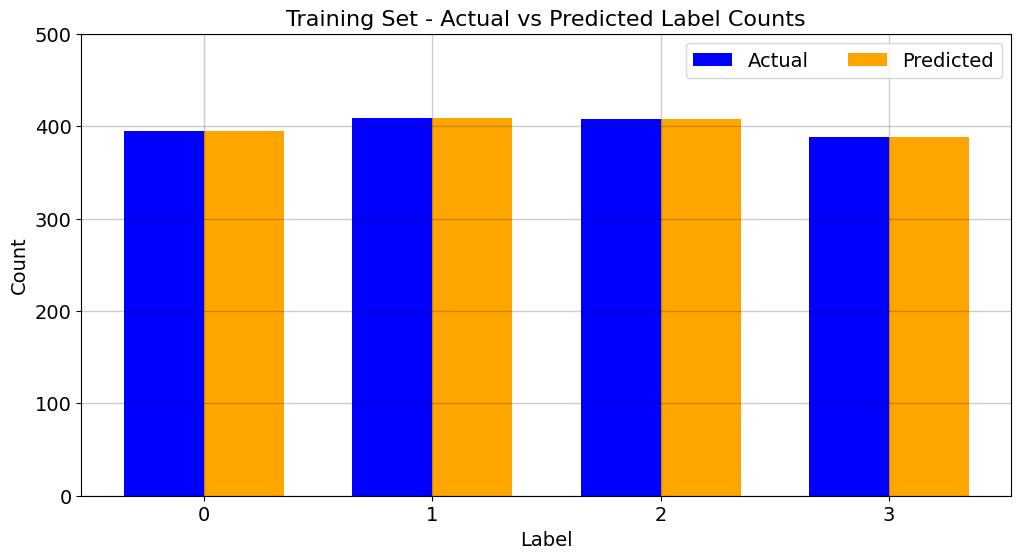

In [44]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [45]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts2 = pd.Series(y_test_pred_classes2).value_counts().sort_index()

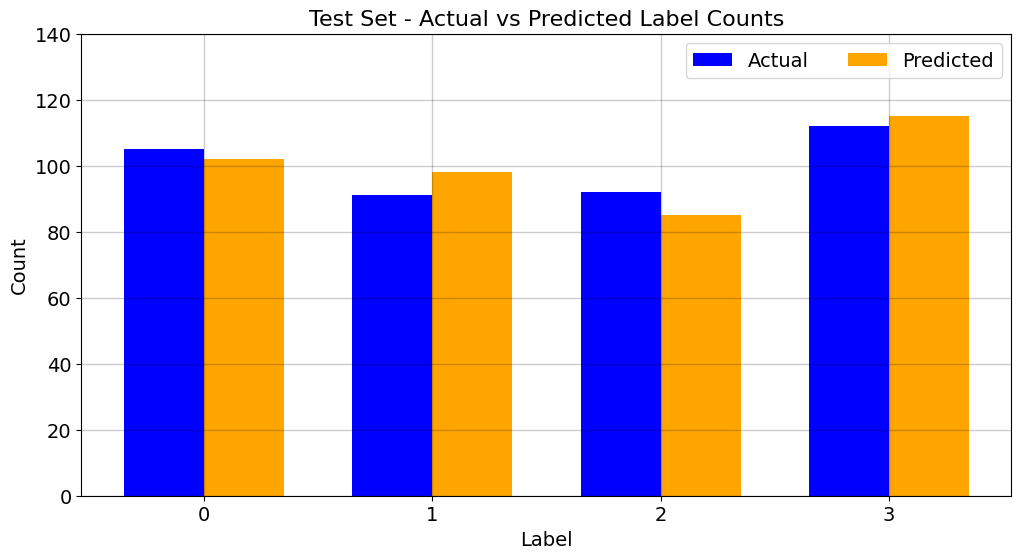

In [47]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

## Sigmoid Activation Function

In [48]:
# Designing the neural network
model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1],)))
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(4, activation='softmax'))

In [49]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2720 - loss: 1.4208 - val_accuracy: 0.2800 - val_loss: 1.3764
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2863 - loss: 1.3682 - val_accuracy: 0.3825 - val_loss: 1.3184
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4103 - loss: 1.3016 - val_accuracy: 0.6600 - val_loss: 1.1512
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6335 - loss: 1.0935 - val_accuracy: 0.7650 - val_loss: 0.8766
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7372 - loss: 0.8576 - val_accuracy: 0.8725 - val_loss: 0.6975
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.6804 - val_accuracy: 0.8575 - val_loss: 0.5818
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8686 - loss: 0.5871 - val_accuracy: 0.8975 - val_loss: 0.4941
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.4967 - val_accuracy: 0.9225 -

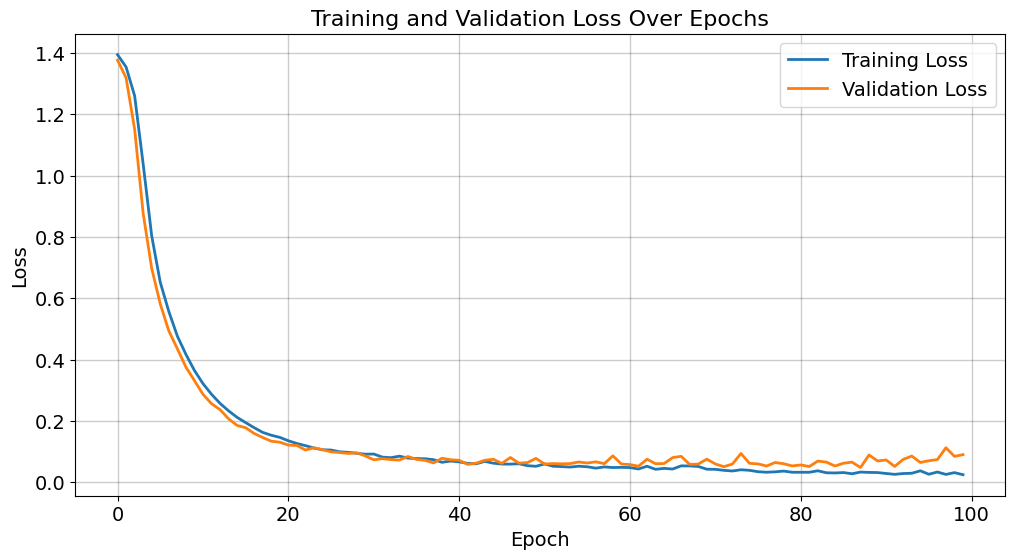

In [50]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

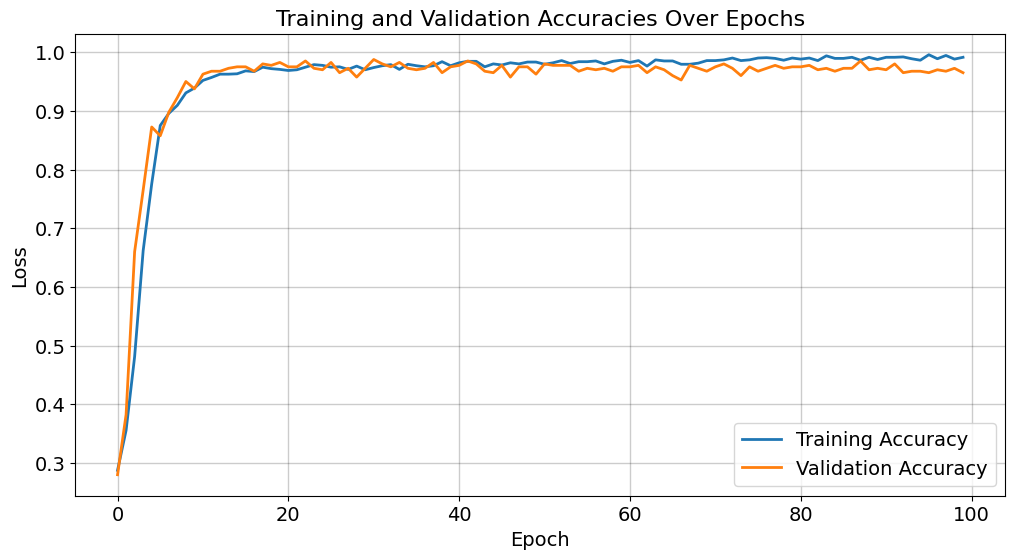

In [51]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [52]:
# Predictions for training and test sets
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [53]:
# Convert predictions to class labels
y_train_pred_classes3 = y_train_pred3.argmax(axis=1)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Training metrics
train_accuracy3 = accuracy_score(y_train, y_train_pred_classes3)
train_precision3 = precision_score(y_train, y_train_pred_classes3, average='macro')
train_recall3 = recall_score(y_train, y_train_pred_classes3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred_classes3, average='macro')

# Test metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred_classes3)
test_precision3 = precision_score(y_test, y_test_pred_classes3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred_classes3, average='macro')
test_f1_3 = f1_score(y_test, y_test_pred_classes3, average='macro')

In [54]:
print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3))
print("Training Recall (in %):",round(train_recall3*100,3))
print("Training F1 Score (in %):",round(train_f1_3*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3))
print("Test Recall (in %):",round(test_recall3*100,3))
print("Test F1 Score (in %):",round(test_f1_3*100,3))

Training Accuracy (in %): 99.688
Training Precision (in %): 99.696
Training Recall (in %): 99.69
Training F1 Score (in %): 99.692

Test Accuracy (in %): 96.5
Test Precision (in %): 96.523
Test Recall (in %): 96.562
Test F1 Score (in %): 96.437


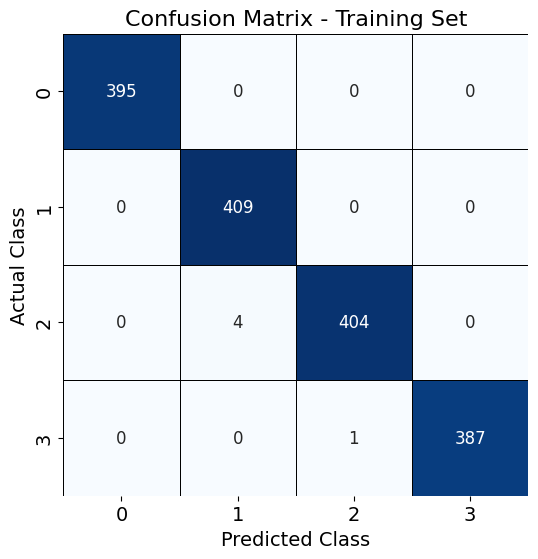

In [56]:
# Confusion matrix for training set
train_conf_matrix3 = confusion_matrix(y_train, y_train_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

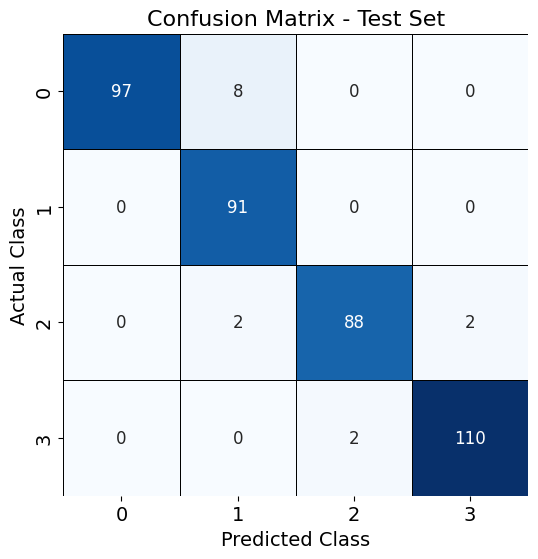

In [57]:
# Confusion matrix for test set
test_conf_matrix3 = confusion_matrix(y_test, y_test_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [58]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts3 = pd.Series(y_train_pred_classes3).value_counts().sort_index()

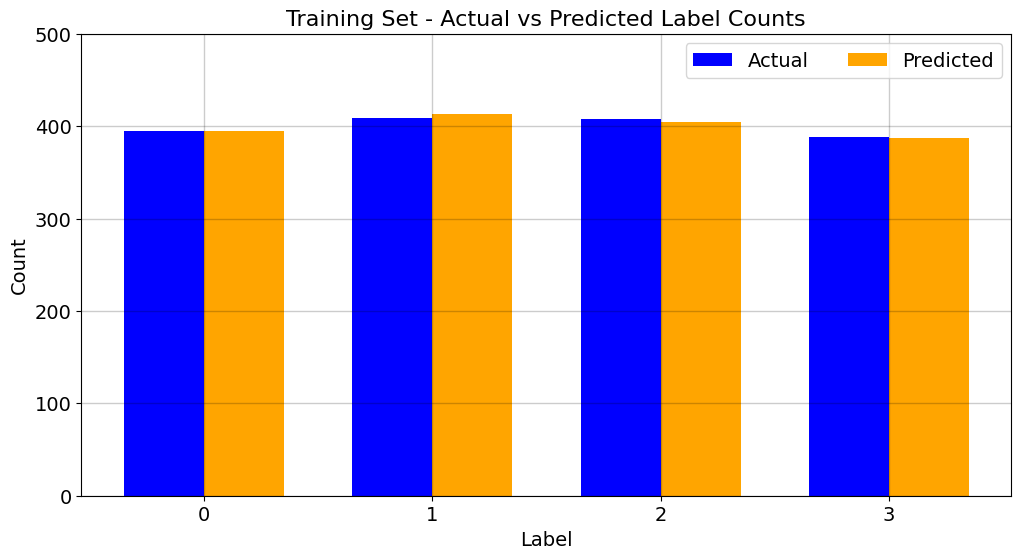

In [60]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,500)
plt.show()

In [61]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts3 = pd.Series(y_test_pred_classes3).value_counts().sort_index()

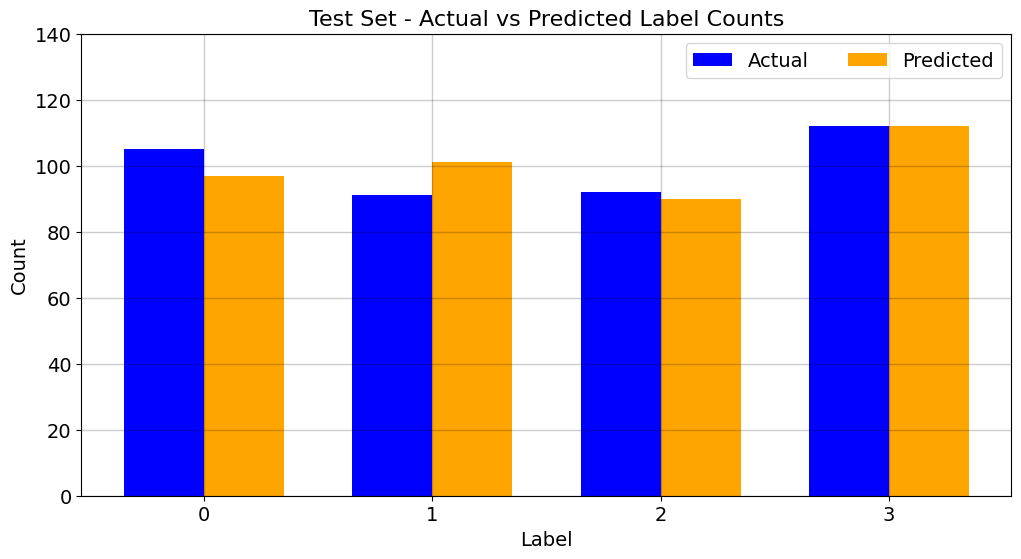

In [62]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.ylim(0,140)
plt.show()

***